# Cars Case Study

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### As we can see there is no null values present in the `cars` dataset
#### Lets check for unique rows

In [6]:
cars.car_ID.nunique()

205

### Data Preparation

In [7]:
#Convert cylindernumber column value to digits
#converting fwd and 4wd to 1 and rwd to 0
#Convert doornumber column to 0 and 1 form lets give 1 to four and 0 to 2
#Convert fueltype value to digits
#Convert enginelocation value to digits
#Convert aspiration value to digits
cars['cylindernumber']=cars['cylindernumber'].map({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12})
cars['drivewheel']=cars['drivewheel'].map({"fwd":1,"4wd":1,"rwd":0})
cars['doornumber']=cars['doornumber'].map({"two":0,"four":1})
cars['fueltype']=cars['fueltype'].map({"gas":1,"diesel":0})
cars['enginelocation']=cars['enginelocation'].map({"front":1,"rear":0})
cars['aspiration']=cars['aspiration'].map({"std":1,"turbo":0})

In [8]:
#Fetching Company name from CarName column and saving in same column
cars['CarName'] = cars['CarName'].str.split(' ',1).str[0]
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,0,convertible,0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,0,convertible,0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,0,hatchback,0,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,1,sedan,1,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,1,sedan,1,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#Modifying car names as there are few mistakes in some of spellings
cars.CarName.replace(['maxda','Nissan','peugeot','porcshce','toyouta','vokswagen','vw']
                     ,['mazda','nissan','peugot','porsche','toyota','volkswagen','volkswagen'],inplace = True)

In [10]:
# Shifting values of symboling column to positive region
cars['symboling'] +=3

### Dummy Variables

In [11]:
# Create the dummies and drop the first column using 'drop_first = True'.
cb_dummy = pd.get_dummies(cars['carbody'], drop_first = True)
et_dummy = pd.get_dummies(cars['enginetype'], drop_first = True)
fs_dummy = pd.get_dummies(cars['fuelsystem'], drop_first = True)
cn_dummy = pd.get_dummies(cars['CarName'], drop_first = True)

# Add the results to the original cars dataframe.
cars = pd.concat([cars, cb_dummy, et_dummy, fs_dummy, cn_dummy], axis = 1)

# Drop columns as we have created the dummies for them.And Car_ID as we don't need it
cars.drop(['carbody','enginetype','fuelsystem','CarName','car_ID'], axis = 1, inplace = True)
cars.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,6,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,6,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,0,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,5,1,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [12]:
#Dividing the data into train and test set
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [13]:
#Initializing scaler
scaler = MinMaxScaler()

In [14]:
#Scaling all non-binary values
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize',
            'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1,1,1,1,1,0.244828,0.426016,0.291667,0.265487,...,0,0,1,0,0,0,0,0,0,0
125,1.0,1,1,0,0,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,1,0,0,0,0,0,0
166,0.6,1,1,0,0,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,0,0,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1,0,1,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [15]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [16]:
X_train[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
            'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building our model(RFE)

In [17]:
# Initializing LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Taking top 15 variables
rfe = RFE(lm,15)             
rfe = rfe.fit(X_train, y_train)

In [19]:
#Checking negatiation of rfe.support_ columns

col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_] #Columns to remove

Index(['symboling', 'aspiration', 'doornumber', 'drivewheel', 'wheelbase',
       'carheight', 'horsepower', 'citympg', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'ohc', 'ohcf', 'ohcv', 'rotor',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [20]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

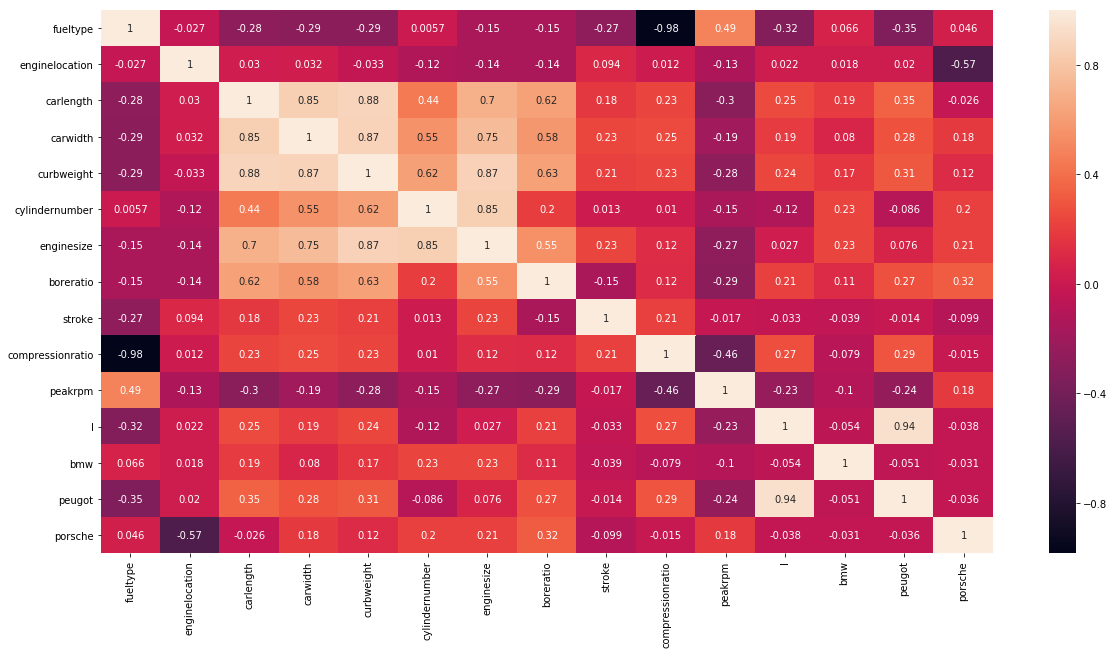

In [21]:
#Checking correlation of independent variables with each other.
plt.figure(figsize = (20,10))        
sns.heatmap(X_train_rfe.corr(),annot = True)

In [22]:
#Removing highly corelated columns
X_train_rfe.drop(['peugot','compressionratio','porsche','peakrpm','boreratio','cylindernumber','curbweight'], axis = 1, inplace = True)

In [23]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [24]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [25]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           2.70e-58
Time:                        17:33:10   Log-Likelihood:                 169.66
No. Observations:                 143   AIC:                            -321.3
Df Residuals:                     134   BIC:                            -294.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3324      0.086      3.

### Running model again

In [26]:
#carlength has high p value. So, we can remove it
X_train_rfe.drop(['carlength'], axis = 1, inplace = True)

In [27]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [28]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [29]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           4.42e-59
Time:                        17:33:11   Log-Likelihood:                 168.90
No. Observations:                 143   AIC:                            -321.8
Df Residuals:                     135   BIC:                            -298.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3267      0.086      3.

### Running model again

In [30]:
#fueltype has high p value. So, we can remove it
X_train_rfe.drop(['fueltype'], axis = 1, inplace = True)

In [31]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [33]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           7.02e-60
Time:                        17:33:11   Log-Likelihood:                 168.09
No. Observations:                 143   AIC:                            -322.2
Df Residuals:                     136   BIC:                            -301.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2890      0.080      3.

### Running model again

In [34]:
#stroke has high p value. So, we can remove it
X_train_rfe.drop(['stroke'], axis = 1, inplace = True)

In [35]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           8.49e-61
Time:                        17:33:12   Log-Likelihood:                 167.47
No. Observations:                 143   AIC:                            -322.9
Df Residuals:                     137   BIC:                            -305.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2786      0.080      3.

### Running model again

In [38]:
#l has high p value. So, we can remove it
X_train_rfe.drop(['l'], axis = 1, inplace = True)

In [39]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [41]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           1.18e-61
Time:                        17:33:12   Log-Likelihood:                 166.60
No. Observations:                 143   AIC:                            -323.2
Df Residuals:                     138   BIC:                            -308.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2782      0.080      3.

In [42]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,18.20
2,enginesize,8.81
0,enginelocation,7.53
3,bmw,1.13


### Running model again

In [44]:
#carwidth has high VIF value. So, we can remove it
X_train_rfe.drop(['carwidth'], axis = 1, inplace = True)

In [45]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           4.93e-48
Time:                        17:33:13   Log-Likelihood:                 131.21
No. Observations:                 143   AIC:                            -254.4
Df Residuals:                     139   BIC:                            -242.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2327      0.102      2.

In [48]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.45
0,enginelocation,3.29
2,bmw,1.10


In [50]:
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_price = lm.predict(X_train_rfe)
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

C:\Users\manish.bisht\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

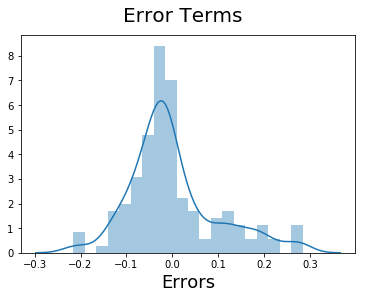

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [52]:
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize',
            'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
y_test = df_test.pop('price')
X_test = df_test

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [55]:
# Making predictions
y_pred = lm.predict(X_test)

## Model Evaluation

Text(0,0.5,'y_pred')

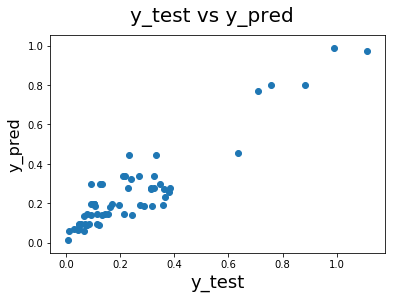

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8529794197516191

## The Varibles which are significant in predicting the price of a car
   ### enginesize
   ### enginelocation
   ### bmw